In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('shopping_data.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dfanual =df[['Annual Income (k$)','Spending Score (1-100)']]

In [5]:
dfanual.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


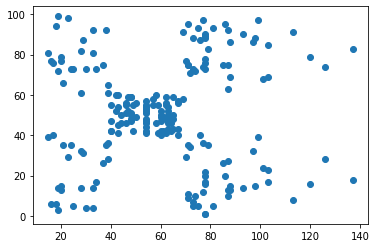

In [6]:
plt.scatter(x=dfanual['Annual Income (k$)'],y= dfanual['Spending Score (1-100)'] )
plt.show()

here we can see 5 types of clsters, where 
1. low income ---low spending
2. low income ---high spending 
3. medium income ---medium spending
4. high income ---low spending
5. high income ---high spending

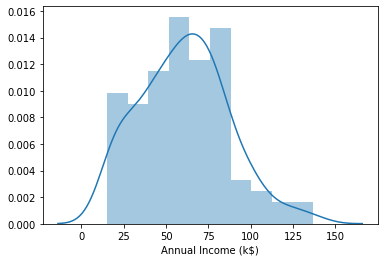

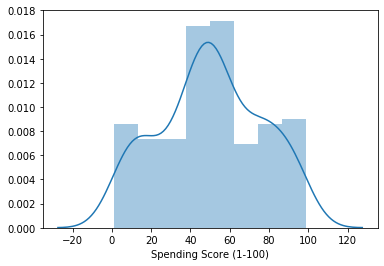

In [7]:
sns.distplot(dfanual['Annual Income (k$)'])
plt.show()
sns.distplot(dfanual['Spending Score (1-100)'])

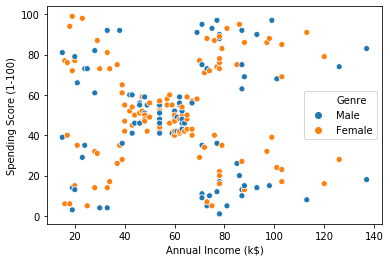

In [8]:
sns.scatterplot(x=df['Annual Income (k$)'],y= df['Spending Score (1-100)'],hue = df['Genre'])

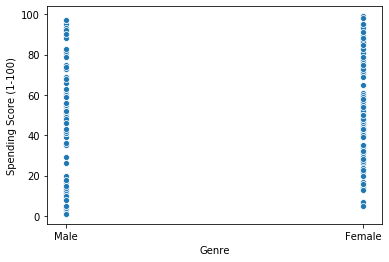

In [9]:
sns.scatterplot(y=df['Spending Score (1-100)'],x = df['Genre'])

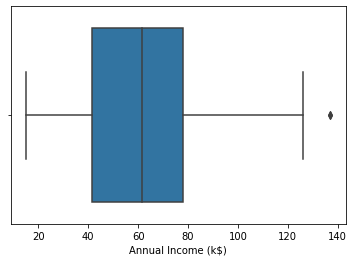

In [10]:
sns.boxplot(df['Annual Income (k$)'])

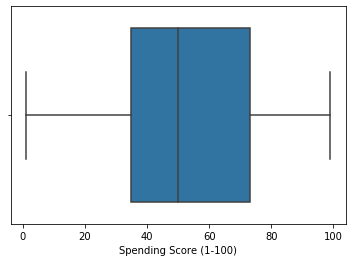

In [11]:
sns.boxplot(df['Spending Score (1-100)'])

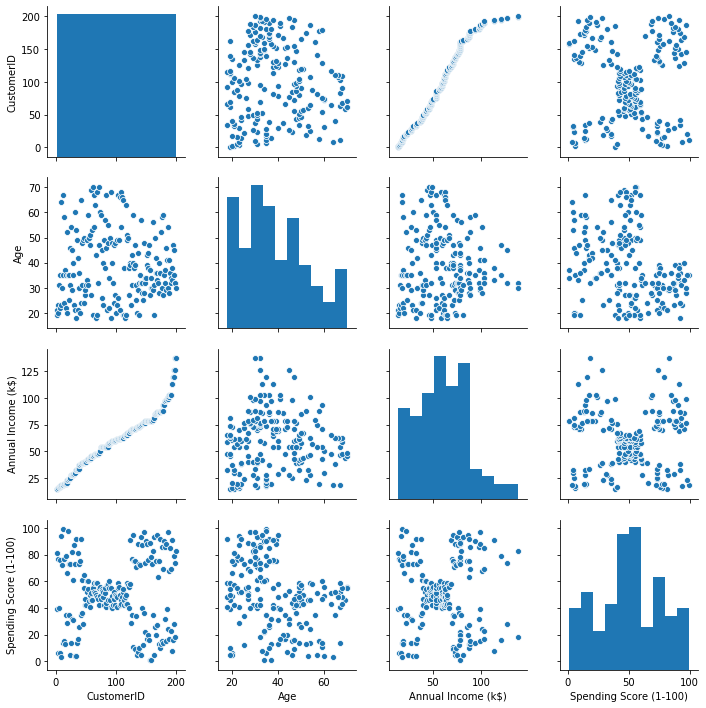

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [14]:
from sklearn.preprocessing  import StandardScaler
dfanscaled =StandardScaler().fit_transform(dfanual)

In [15]:
dfanscaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [16]:
from sklearn.cluster import KMeans



In [17]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )#, n_init = 10
  clusters.fit(dfanscaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,400.000000
1,2,269.299343
2,3,157.704008
3,4,108.921317
4,5,65.568408
5,6,55.057348
6,7,44.864756
7,8,37.228188
8,9,32.406660
9,10,29.101173


In [18]:
kmean = KMeans(n_clusters= 5)
kmean.fit_transform(dfanscaled)

array([[3.20302576, 2.92033087, 1.59136934, 0.8241417 , 1.61959155],
       [2.73093348, 3.73598158, 1.96453204, 2.37223989, 0.41435257],
       [3.99794559, 2.78940569, 2.25920692, 0.69990996, 2.87218971],
       [2.69976324, 3.60549219, 1.84064438, 2.21262088, 0.38245529],
       [3.11766122, 2.8592051 , 1.50773152, 0.82169642, 1.56404344],
       [2.66488413, 3.55128873, 1.78706417, 2.16784949, 0.35779488],
       [3.9469387 , 2.71401132, 2.20926223, 0.66003919, 2.86332228],
       [2.65636119, 4.01109194, 2.23797979, 2.85499997, 0.64019646],
       [4.01024202, 2.69756035, 2.27611737, 0.74921911, 2.97565515],
       [2.60771783, 3.39362443, 1.63739998, 2.00277613, 0.38425828],
       [3.69334368, 2.64409006, 1.95465594, 0.38698347, 2.55047711],
       [2.65981256, 4.13306168, 2.36841727, 3.04425126, 0.80439857],
       [3.6389014 , 2.60444877, 1.90021642, 0.33256467, 2.50824135],
       [2.54752609, 3.49018279, 1.71850934, 2.19063962, 0.23708397],
       [3.69490341, 2.60805057, 1.

In [19]:
kmean.cluster_centers_

array([[ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-0.20091257, -0.02645617],
       [-1.30751869, -1.13696536],
       [-1.32954532,  1.13217788]])

In [20]:
label = kmean.labels_

In [21]:
dflabel =pd.DataFrame(label)

In [22]:
dfanual = dfanual.join(dflabel)

In [25]:
dfanual.rename(columns={0:'result'},inplace=True)

In [26]:
dfanual.head()

,Annual Income (k$),Spending Score (1-100),result
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


In [30]:
dfanual.result.value_counts()

2    81
0    39
1    35
3    23
4    22
Name: result, dtype: int64

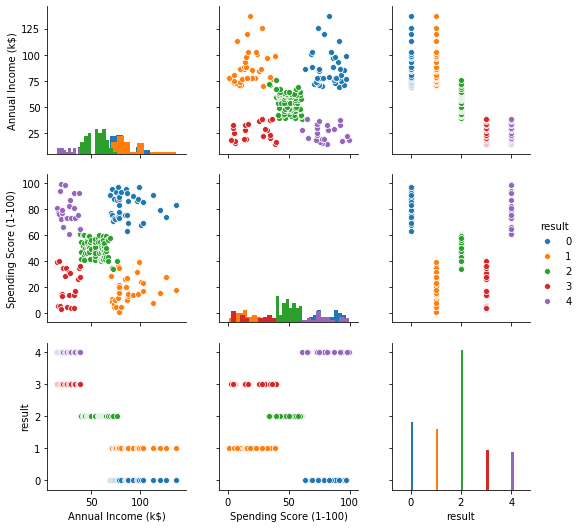

In [59]:
sns.pairplot(dfanual,diag_kind ='hist',hue = 'result')#diag_kind ='kde', hue = 'result'

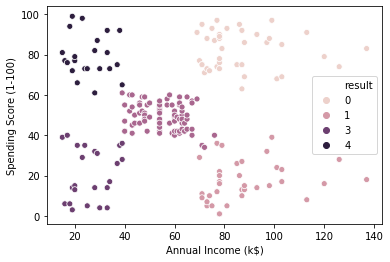

In [40]:
sns.scatterplot(x =dfanual['Annual Income (k$)'],y = dfanual['Spending Score (1-100)'],hue =dfanual.result )
plt.show()

In [41]:
dfanual.head()

,Annual Income (k$),Spending Score (1-100),result
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


In [43]:
y = dfanual['result']
x = dfanual.drop(columns='result')

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [46]:
from sklearn.ensemble  import RandomForestClassifier 
rf =RandomForestClassifier()

In [47]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
ypred =rf.predict(X_train)
ytestpred =rf.predict(X_test)


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred,y_train)

1.0

In [51]:
accuracy_score(ytestpred,y_test)

0.9666666666666667